<a href="https://colab.research.google.com/github/Rutujaborawake29/LGMVIP-DataScience/blob/main/lgmvip_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LETS** **GROW** **MORE** **VIRTUAL** **INTERNSHIP** **PROGRAM**

Data Science Intern
 
Author-Rutuja Borawake

Level-Advanced

Task Name- Develop Neural Network to read handwriting

# **Importing**  **Libraries**

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

**Load** **the** **MNIST** **dataset**. **We** **make** **a** **split** **of** **train** **and** **test** **set** **with** **60k** **samples** **in** **training** **and** **10K** **samples** **in** **test**

In [5]:
(mnist_train_images, mnist_train_labels),(mnist_test_images, mnist_test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
train = mnist_train_images.reshape(60000,784)
test = mnist_test_images.reshape(10000,784)

In [7]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255


In [8]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

# **Visualizing** **the** **dataset**.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


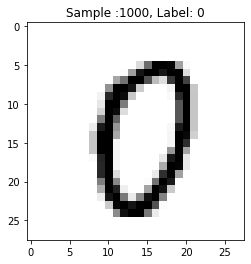

In [9]:
import matplotlib.pyplot as plt
def display(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    image = train[num].reshape([28,28])
    plt.title('Sample :%d, Label: %d' % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display(1000)


# **Building** **Sequential** **Model** **in** **neural** **network**

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# **Model** **Optimization**

In [13]:
model.compile(loss = 'categorical_crossentropy',optimizer = RMSprop(),metrics = ['accuracy'])

# **Fitting** **the** **training** **data** **to** **the** **model**

In [14]:
history = model.fit(train,train_labels,batch_size = 100,epochs = 10, verbose = 2,validation_data = (test,test_labels))


Epoch 1/10
600/600 - 12s - loss: 0.2414 - accuracy: 0.9244 - val_loss: 0.1252 - val_accuracy: 0.9614 - 12s/epoch - 21ms/step
Epoch 2/10
600/600 - 10s - loss: 0.1015 - accuracy: 0.9689 - val_loss: 0.0839 - val_accuracy: 0.9743 - 10s/epoch - 17ms/step
Epoch 3/10
600/600 - 11s - loss: 0.0745 - accuracy: 0.9774 - val_loss: 0.0738 - val_accuracy: 0.9779 - 11s/epoch - 19ms/step
Epoch 4/10
600/600 - 10s - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0851 - val_accuracy: 0.9780 - 10s/epoch - 17ms/step
Epoch 5/10
600/600 - 9s - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0719 - val_accuracy: 0.9807 - 9s/epoch - 15ms/step
Epoch 6/10
600/600 - 10s - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0663 - val_accuracy: 0.9827 - 10s/epoch - 16ms/step
Epoch 7/10
600/600 - 10s - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0720 - val_accuracy: 0.9823 - 10s/epoch - 16ms/step
Epoch 8/10
600/600 - 9s - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0683 - val_accuracy: 0.9824 - 9s/epoch - 16ms/step
Epoc

# **Model** **Evaluation**

In [15]:
score = model.evaluate(test,test_labels,verbose = 0)
print("Test loss",score[0])
print("Test accuracy",score[1])

Test loss 0.0840328112244606
Test accuracy 0.9814000129699707


1/1 [==============================] - 0s 26ms/step


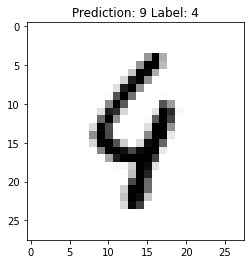

1/1 [==============================] - 0s 94ms/step


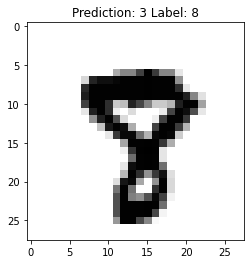

1/1 [==============================] - 0s 33ms/step


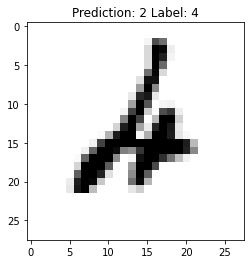

1/1 [==============================] - 0s 23ms/step


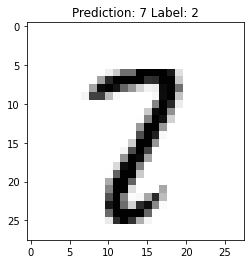

1/1 [==============================] - 0s 22ms/step


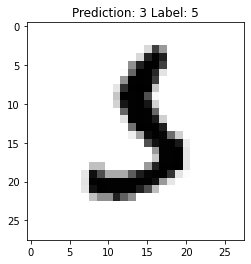

1/1 [==============================] - 0s 39ms/step


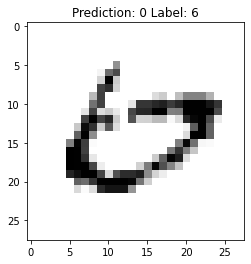

1/1 [==============================] - 0s 22ms/step


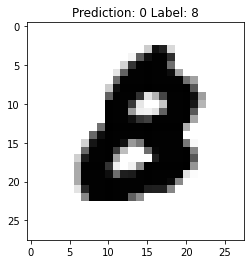

1/1 [==============================] - 0s 33ms/step


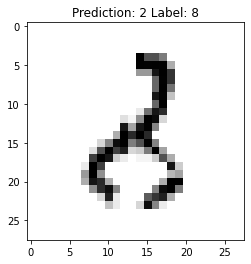

1/1 [==============================] - 0s 35ms/step


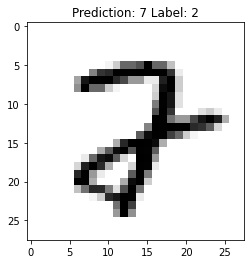

1/1 [==============================] - 0s 22ms/step


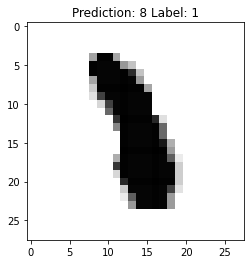

1/1 [==============================] - 0s 21ms/step


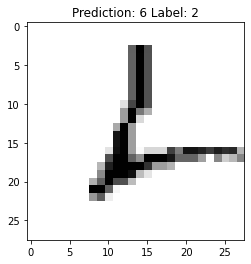

1/1 [==============================] - 0s 22ms/step


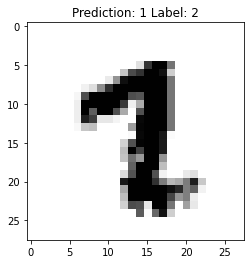

1/1 [==============================] - 0s 21ms/step


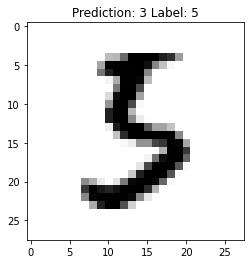

1/1 [==============================] - 0s 24ms/step


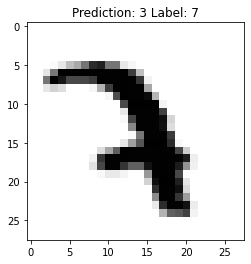

1/1 [==============================] - 0s 34ms/step


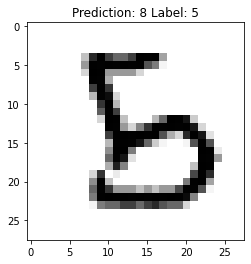

1/1 [==============================] - 0s 28ms/step


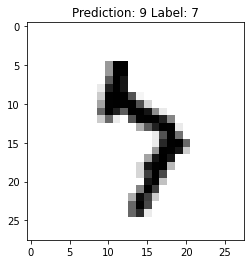

1/1 [==============================] - 0s 26ms/step


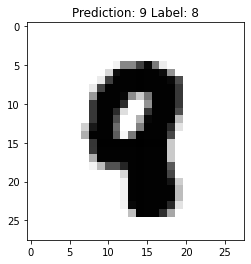

1/1 [==============================] - 0s 26ms/step


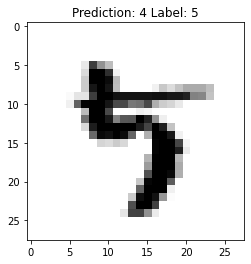

1/1 [==============================] - 0s 24ms/step


In [18]:
for x in range(1000):
    test_image = test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()
